In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
##import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import style

market = pd.read_csv('supermarket_sales.csv')

In [3]:
# Peek at data

market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Check if data is clean

print(market.count(), '\n')
print(market.isna().sum())

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross 

In [5]:
#
payment = market['Payment']
total = market['Total']

print(payment.head(), '\n')
print(total.head())

0        Ewallet
1           Cash
2    Credit card
3        Ewallet
4        Ewallet
Name: Payment, dtype: object 

0    548.9715
1     80.2200
2    340.5255
3    489.0480
4    634.3785
Name: Total, dtype: float64


In [6]:
# Viewing payment column

market.Payment

0          Ewallet
1             Cash
2      Credit card
3          Ewallet
4          Ewallet
          ...     
995        Ewallet
996        Ewallet
997           Cash
998           Cash
999           Cash
Name: Payment, Length: 1000, dtype: object

In [7]:
market

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [8]:
# Total payments made per payment type

print(market.groupby(by=['Payment'])['Total'].sum())

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64


In [9]:
# Quickly find how many payments using cash, credit, ewallet

print(market.groupby(by=['Payment']).count())

             Invoice ID  Branch  City  Customer type  Gender  Product line  \
Payment                                                                      
Cash                344     344   344            344     344           344   
Credit card         311     311   311            311     311           311   
Ewallet             345     345   345            345     345           345   

             Unit price  Quantity  Tax 5%  Total  Date  Time  cogs  \
Payment                                                              
Cash                344       344     344    344   344   344   344   
Credit card         311       311     311    311   311   311   311   
Ewallet             345       345     345    345   345   345   345   

             gross margin percentage  gross income  Rating  
Payment                                                     
Cash                             344           344     344  
Credit card                      311           311     311  
Ewallet       

In [10]:
# Storing payment total info

casht = 112206.570
creditt = 100767.072
ewallett = 109993.107
totalt = [casht,creditt,ewallett]

Text(0.5, 1.0, 'Sum of Payment Type')

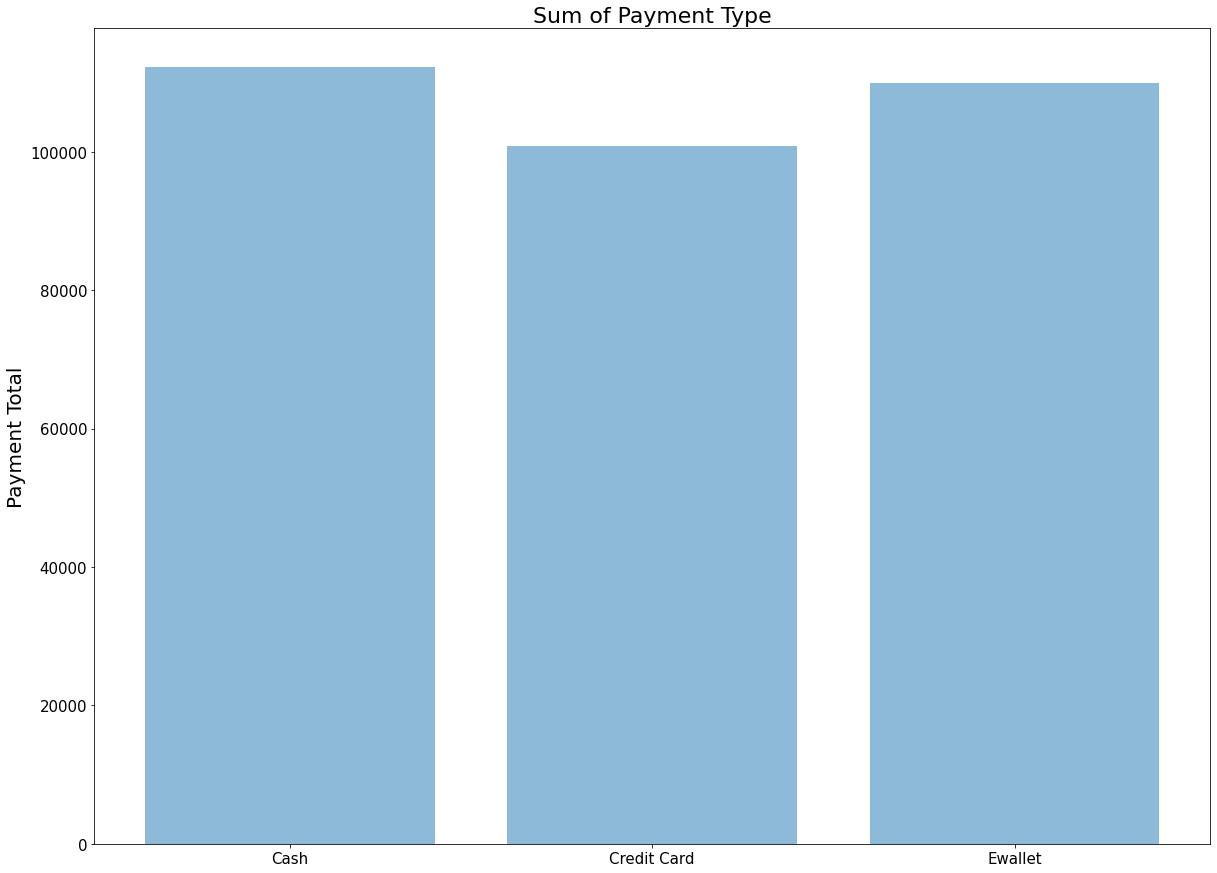

In [11]:
# Plot total payments per payment type

typelabels = ['Cash', 'Credit Card', 'Ewallet']
y_pos = np.arange(len(typelabels))

plt.figure(figsize=(20, 15))
plt.bar(y_pos, totalt, align='center', alpha=0.5)
plt.xticks(y_pos, typelabels)
plt.xticks(fontsize=15, rotation='horizontal')
plt.yticks(fontsize = 15)
plt.ylabel('Payment Total', fontsize = 20)
plt.title('Sum of Payment Type', fontdict = {'fontsize' : 22})

C:\Users\prias\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='Total'>

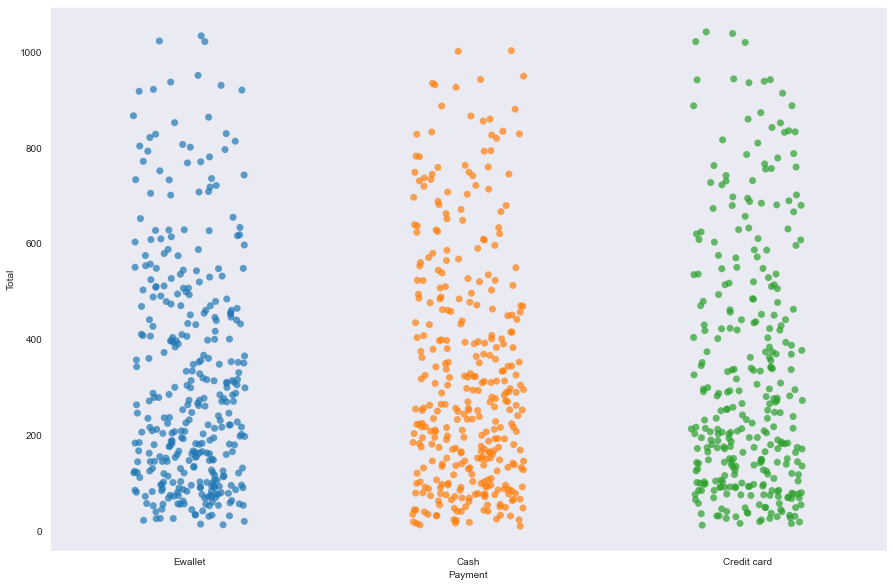

In [12]:
plt.figure(figsize = (15,10))
sns.set_style('dark')
sns.stripplot(payment, total, size=7, jitter = 0.2, alpha=0.7)
#sns.set_context('poster')


C:\Users\prias\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Money Spent per Payment')

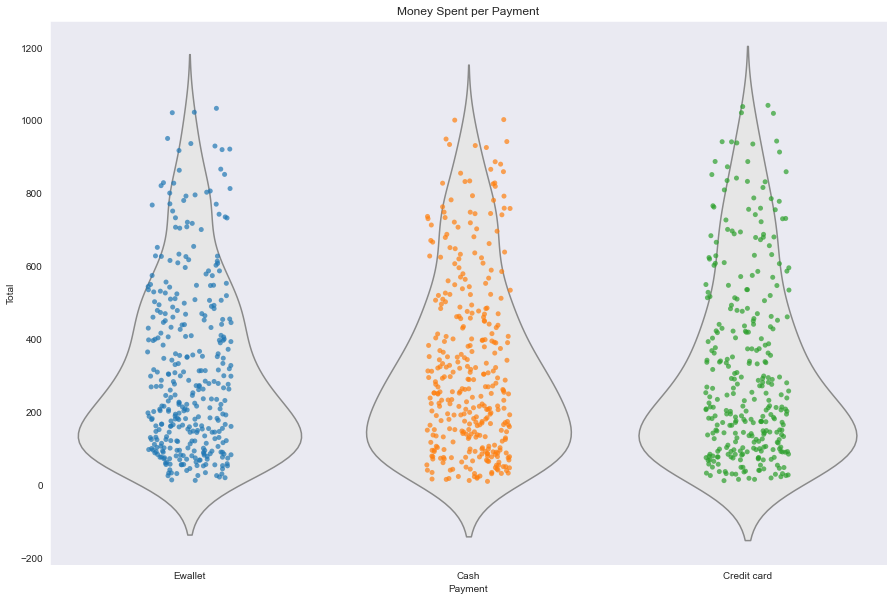

In [13]:
plt.figure(figsize = (15,10))
sns.set_style('dark')
th = sns.violinplot(payment, total, inner=None, color='.9')
th = sns.stripplot(x=payment, y=total, jitter = 0.15, alpha=0.7)
plt.title('Money Spent per Payment')
#sns.set_context('poster')

In [14]:
market

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [18]:
print(market.groupby(by=['Customer type'])['Total'].sum(), '\n')
print(market.groupby(by=['Customer type']).count())

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64 

               Invoice ID  Branch  City  Gender  Product line  Unit price  \
Customer type                                                               
Member                501     501   501     501           501         501   
Normal                499     499   499     499           499         499   

               Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
Customer type                                                       
Member              501     501    501   501   501      501   501   
Normal              499     499    499   499   499      499   499   

               gross margin percentage  gross income  Rating  
Customer type                                                 
Member                             501           501     501  
Normal                             499           499     499  
